In [31]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/pivot_catcherr.csv')
data.head()

,name,season_0,season_1,season_2,age_0,age_1,age_2,weight_0,weight_1,weight_2,...,yacK_0,yacK_1,yacK_2,td_points_0,td_points_1,td_points_2,compilation_0,compilation_1,compilation_2,compilation_3
0,A.J. Green,2011.0,2012.0,2013.0,23.0,24.0,25.0,205.0,205.0,205.0,...,81.219489,139.522963,123.114306,1.024475,1.897369,1.562539,53.006410,98.471570,82.935491,59.741763
1,A.J. Jenkins,2012.0,2013.0,2014.0,23.0,24.0,25.0,192.0,192.0,192.0,...,0.000000,16.276923,0.000000,0.000000,0.000000,0.000000,0.000000,0.597268,0.000000,0.000000
2,Aaron Brown,2009.0,2010.0,2011.0,24.0,25.0,26.0,196.0,196.0,196.0,...,84.000000,0.000000,0.000000,0.027441,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000
3,Aaron Halterman,2007.0,2008.0,2009.0,25.0,26.0,27.0,255.0,255.0,255.0,...,1.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000
4,Aaron Moorehead,2003.0,2004.0,2005.0,23.0,24.0,25.0,200.0,200.0,200.0,...,2.534653,1.285714,4.320000,0.000000,0.000000,0.000000,0.240777,0.025880,0.222518,0.274562


In [9]:
print data.columns

Index([u'name', u'season_0', u'season_1', u'season_2', u'age_0', u'age_1',
       u'age_2', u'weight_0', u'weight_1', u'weight_2',
       ...
       u'yacK_0', u'yacK_1', u'yacK_2', u'td_points_0', u'td_points_1',
       u'td_points_2', u'compilation_0', u'compilation_1', u'compilation_2',
       u'compilation_3'],
      dtype='object', length=146)


In [10]:
## I am dropping some of our engineered features since they will be co-linear with
## the other features that were used to create them

data.drop(['yacK_0', 'yacK_1', 'yacK_2', 'td_points_0', 'td_points_1', 'td_points_2'],
         axis = 1, inplace = True)
print data.columns

Index([u'name', u'season_0', u'season_1', u'season_2', u'age_0', u'age_1',
       u'age_2', u'weight_0', u'weight_1', u'weight_2',
       ...
       u'pct_team_touchdowns_0', u'pct_team_touchdowns_1',
       u'pct_team_touchdowns_2', u'dropK_0', u'dropK_1', u'dropK_2',
       u'compilation_0', u'compilation_1', u'compilation_2', u'compilation_3'],
      dtype='object', length=140)


season_0 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


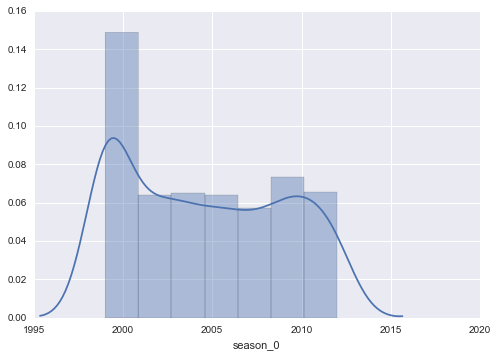


season_1 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


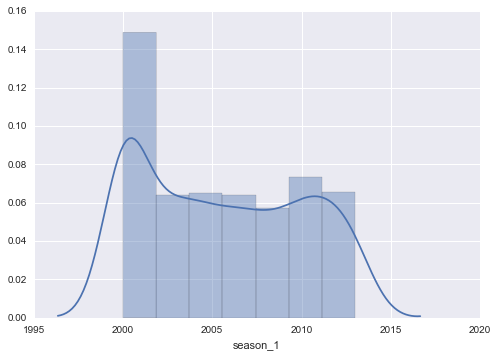


season_2 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


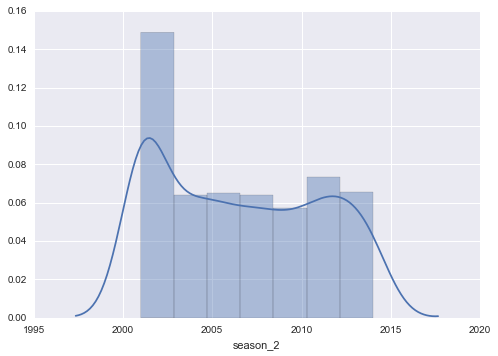


age_0 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


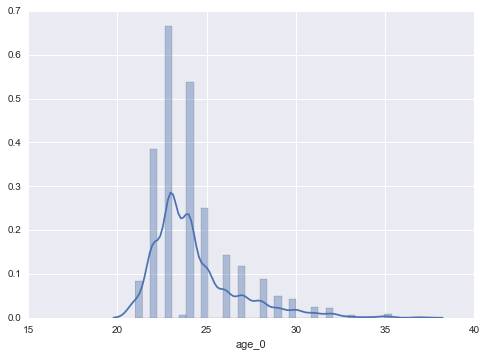


age_1 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


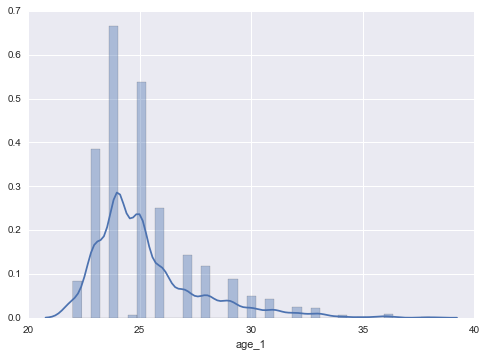


age_2 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


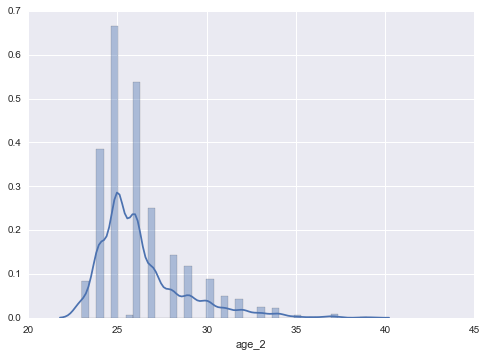


weight_0 :
NormaltestResult(statistic=60.979810355981137, pvalue=5.7332704319870866e-14)


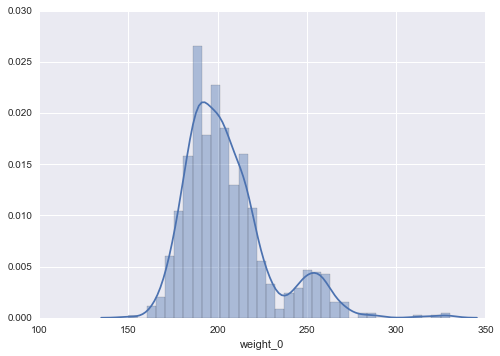


weight_1 :
NormaltestResult(statistic=60.979810355981137, pvalue=5.7332704319870866e-14)


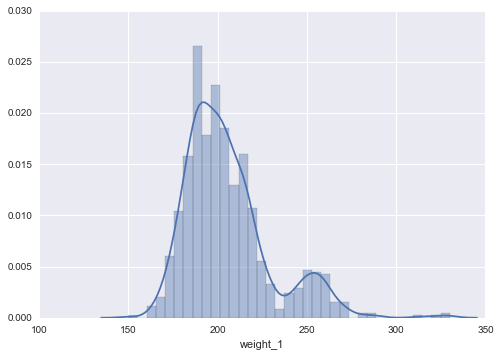


weight_2 :
NormaltestResult(statistic=60.979810355981137, pvalue=5.7332704319870866e-14)


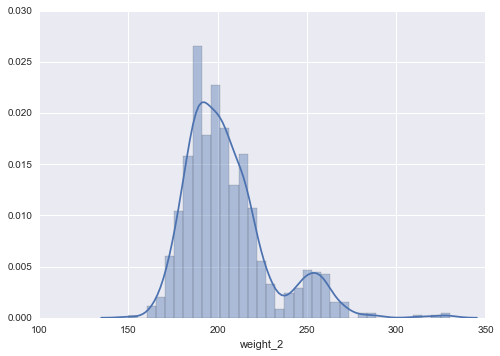


bmi_0 :
NormaltestResult(statistic=62.588585400139038, pvalue=2.5648464206685131e-14)


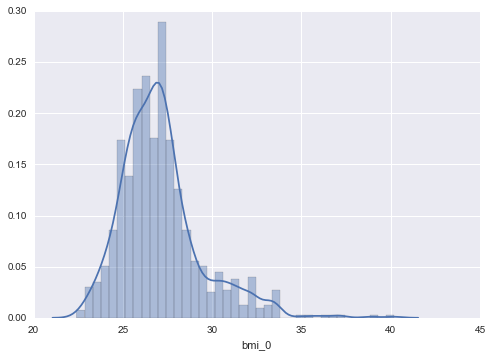


bmi_1 :
NormaltestResult(statistic=62.588585400139038, pvalue=2.5648464206685131e-14)


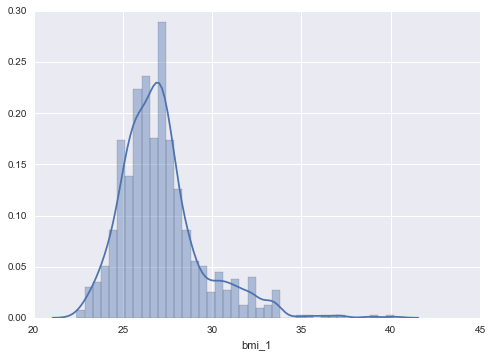


bmi_2 :
NormaltestResult(statistic=62.588585400139038, pvalue=2.5648464206685131e-14)


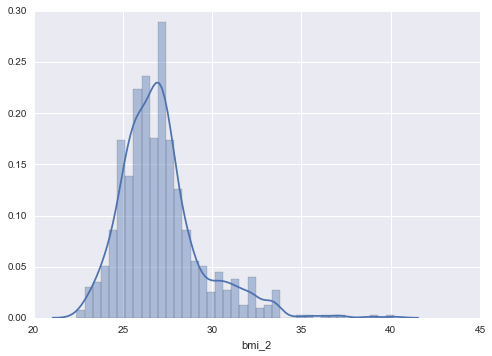


games_0 :
NormaltestResult(statistic=48.23042432765557, pvalue=3.3643132601592961e-11)


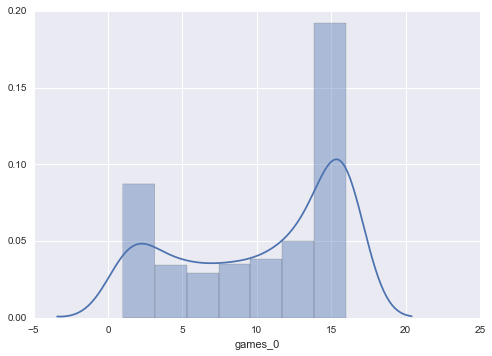


games_1 :
NormaltestResult(statistic=masked, pvalue=1.0)


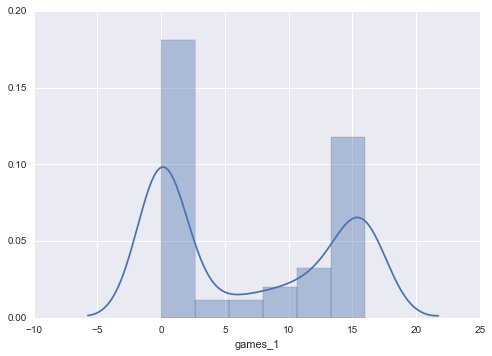


games_2 :
NormaltestResult(statistic=198.38086872911754, pvalue=8.3587569611129675e-44)


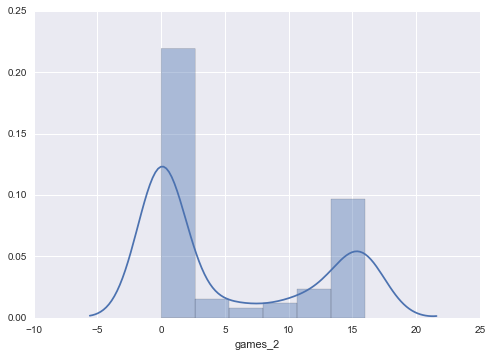


rush_atts_0 :
NormaltestResult(statistic=172.57387569548501, pvalue=3.3578325319042705e-38)


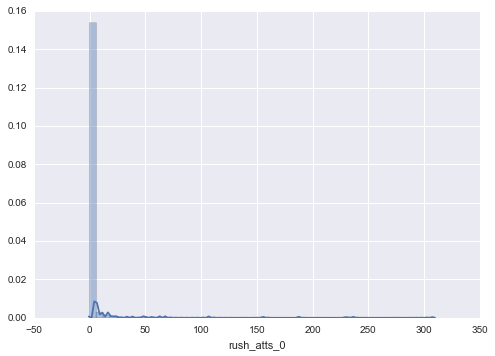


rush_atts_1 :
NormaltestResult(statistic=82.043798532927667, pvalue=1.5290282569181753e-18)


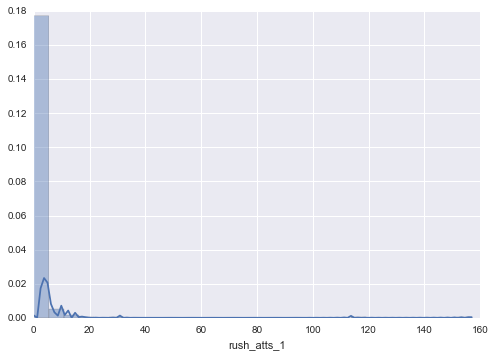


rush_atts_2 :
NormaltestResult(statistic=110.62824145907456, pvalue=9.4925434965386061e-25)


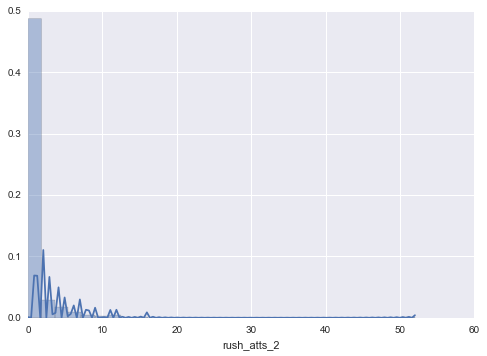


rush_yds_0 :
NormaltestResult(statistic=169.80203622912367, pvalue=1.3426299318490008e-37)


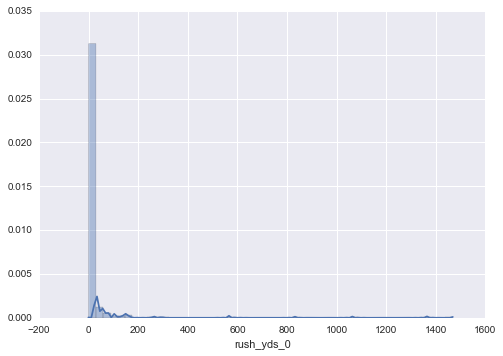


rush_yds_1 :
NormaltestResult(statistic=81.961128439937283, pvalue=1.5935551345382627e-18)


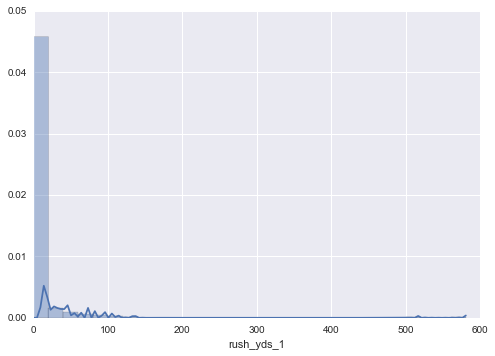


rush_yds_2 :
NormaltestResult(statistic=98.314368000300846, pvalue=4.4802912062907798e-22)


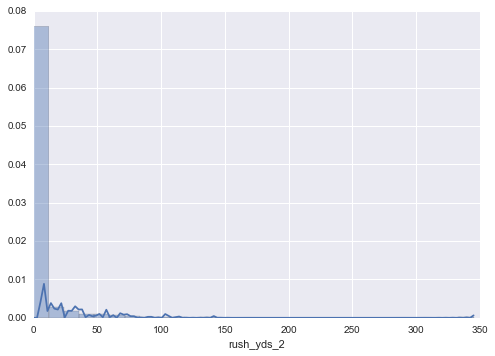


rush_y/a_0 :
NormaltestResult(statistic=77.331653107407533, pvalue=1.613039080321198e-17)


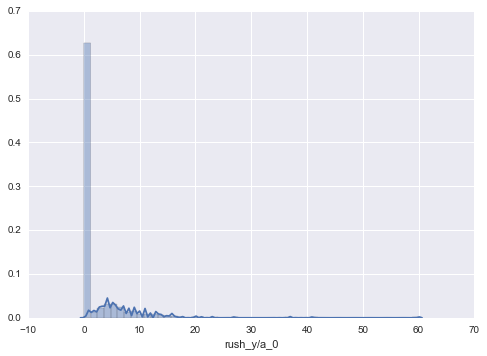


rush_y/a_1 :
NormaltestResult(statistic=145.02575619813723, pvalue=3.2214928712932288e-32)


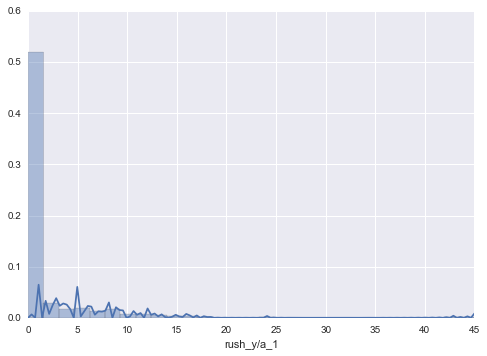


rush_y/a_2 :
NormaltestResult(statistic=76.451372925866593, pvalue=2.5049283165144476e-17)


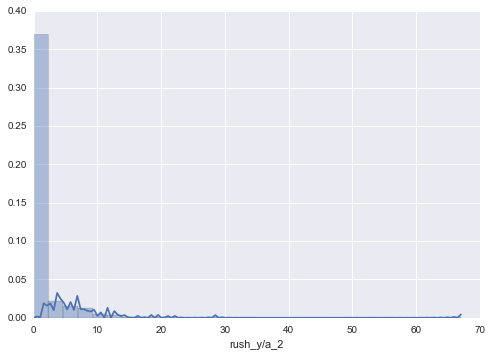


rush_tds_0 :
NormaltestResult(statistic=168.48425183218038, pvalue=2.5948339462590517e-37)


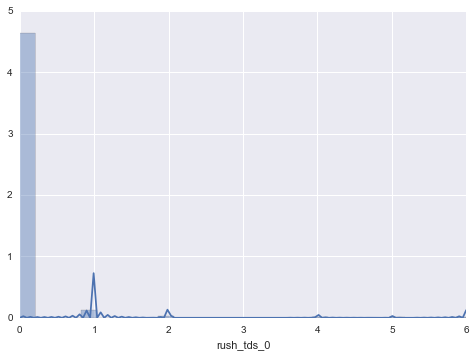


rush_tds_1 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


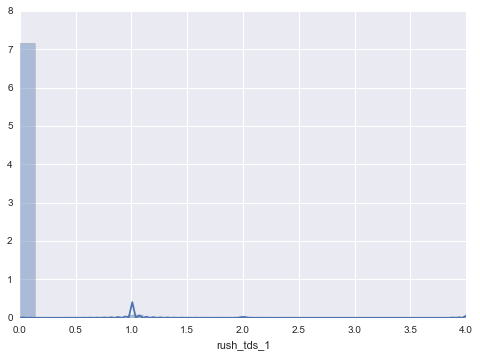


rush_tds_2 :
NormaltestResult(statistic=216.00196087917988, pvalue=1.2467235264002369e-47)


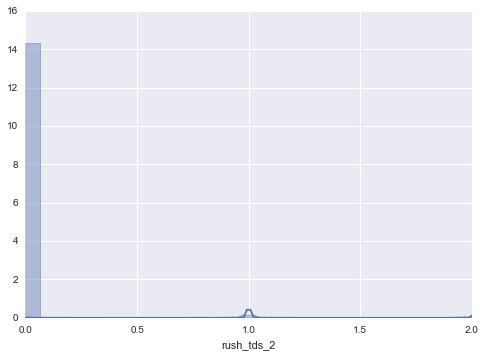


rush_ypg_0 :
NormaltestResult(statistic=169.1127307248027, pvalue=1.8951217384144764e-37)


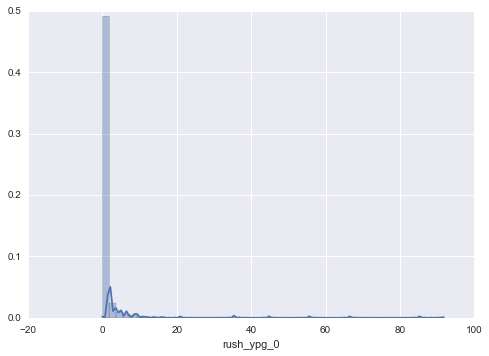


rush_ypg_1 :
NormaltestResult(statistic=79.089783246239946, pvalue=6.6968686452917422e-18)


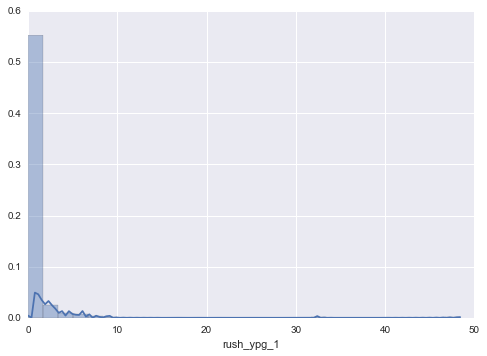


rush_ypg_2 :
NormaltestResult(statistic=112.20000330280176, pvalue=4.3259236291214146e-25)


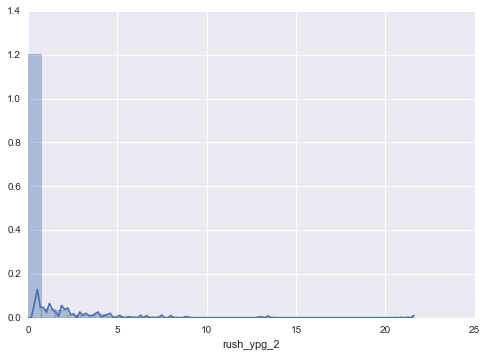


targets_0 :
NormaltestResult(statistic=19.681224185533317, pvalue=5.3244710440115483e-05)


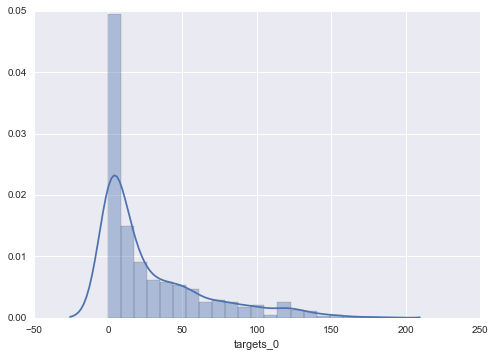


targets_1 :
NormaltestResult(statistic=19.675348724214633, pvalue=5.340135904146282e-05)


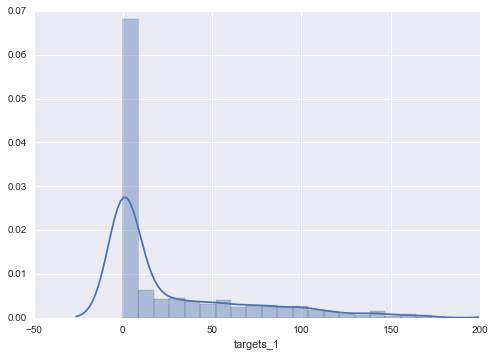


targets_2 :
NormaltestResult(statistic=41.385743643799017, pvalue=1.0308606285434772e-09)


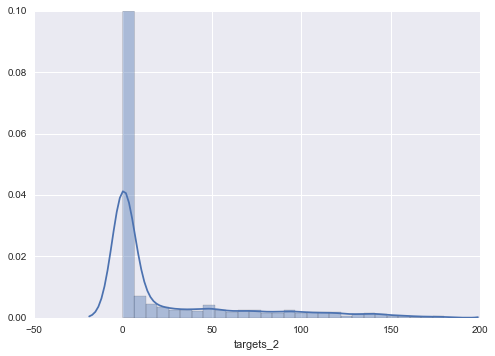


receptions_0 :
NormaltestResult(statistic=18.363334395268627, pvalue=0.00010290882070775562)


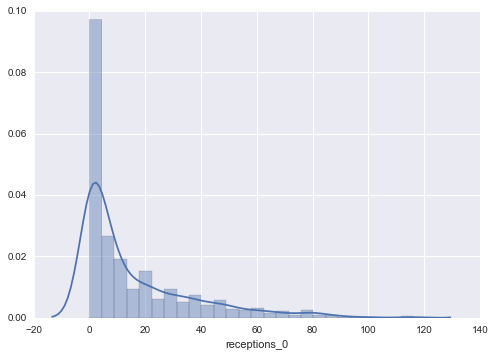


receptions_1 :
NormaltestResult(statistic=24.927757627670989, pvalue=3.86372500032244e-06)


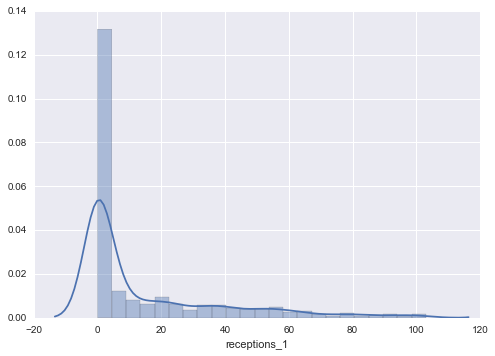


receptions_2 :
NormaltestResult(statistic=46.481607599869633, pvalue=8.0657945337572698e-11)


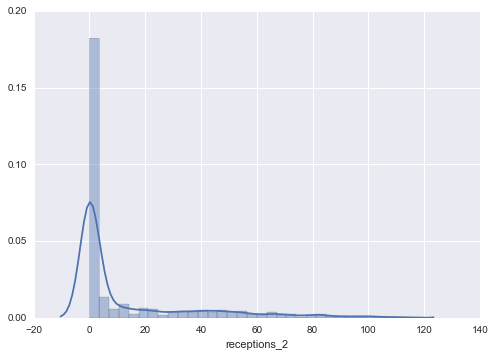


rec_yards_0 :
NormaltestResult(statistic=25.548701592497036, pvalue=2.8325001353814132e-06)


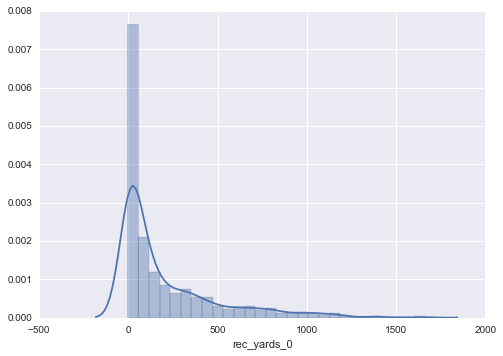


rec_yards_1 :
NormaltestResult(statistic=21.306080514021982, pvalue=2.3628894372364551e-05)


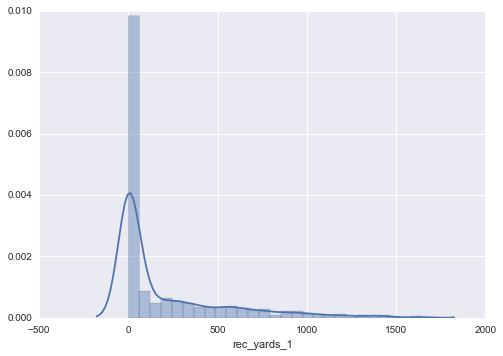


rec_yards_2 :
NormaltestResult(statistic=51.153627229093118, pvalue=7.8006534153214245e-12)


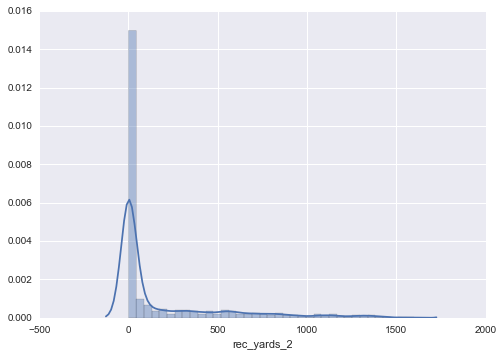


yards/reception_0 :
NormaltestResult(statistic=0.44235781383130901, pvalue=0.80157326046147792)


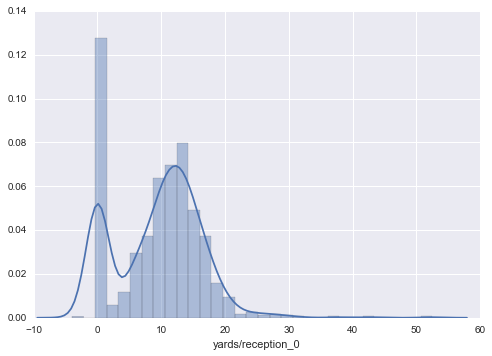


yards/reception_1 :
NormaltestResult(statistic=16.993619972706817, pvalue=0.00020411847225224638)


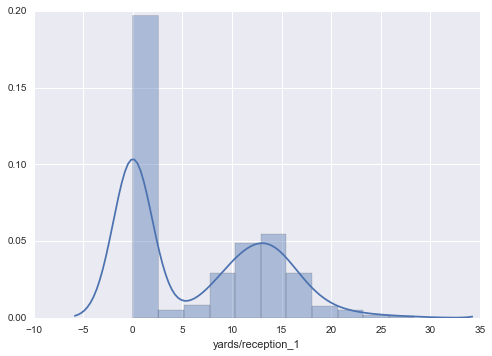


yards/reception_2 :
NormaltestResult(statistic=45.547339253040782, pvalue=1.2868293226937227e-10)


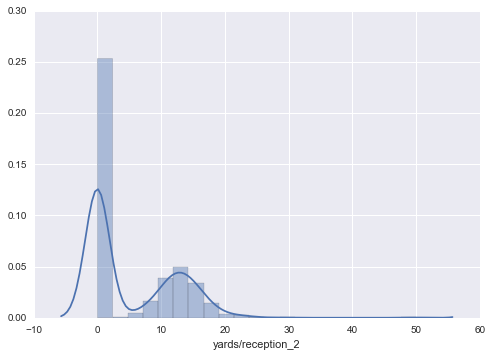


rec_tds_0 :
NormaltestResult(statistic=40.643626598150789, pvalue=1.4939932040490823e-09)


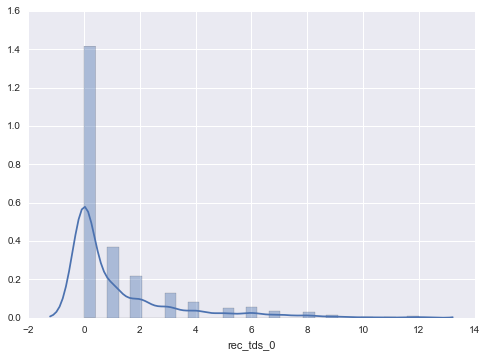


rec_tds_1 :
NormaltestResult(statistic=47.257915614759639, pvalue=5.4710919161598559e-11)


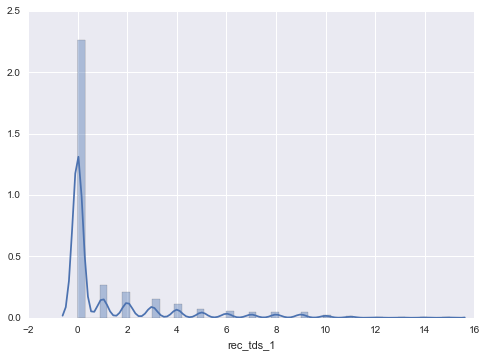


rec_tds_2 :
NormaltestResult(statistic=67.556388474581965, pvalue=2.1395213967008534e-15)


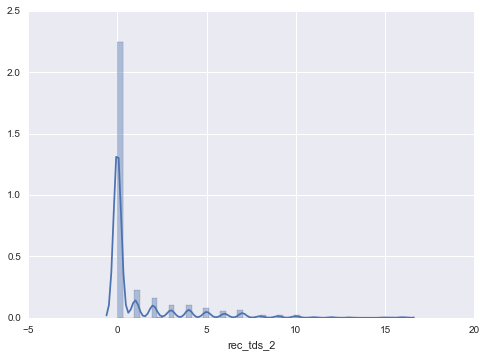


rec_ypg_0 :
NormaltestResult(statistic=21.884934579112041, pvalue=1.7690774135522811e-05)


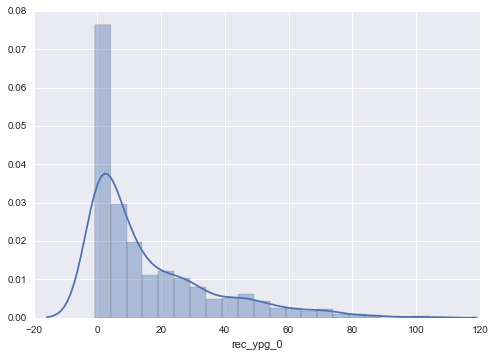


rec_ypg_1 :
NormaltestResult(statistic=19.006305575603413, pvalue=7.4616209577089277e-05)


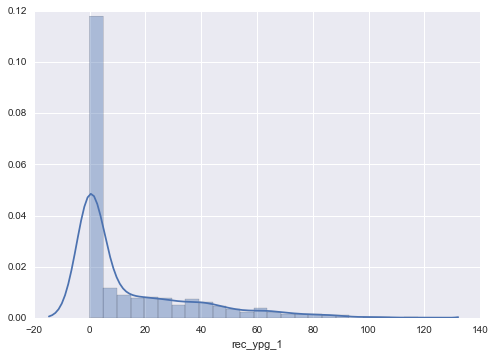


rec_ypg_2 :
NormaltestResult(statistic=45.8724571400586, pvalue=1.0937611576428928e-10)


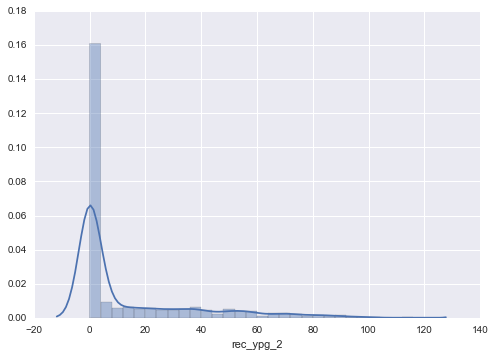


ctch_pct_0 :
NormaltestResult(statistic=6.5578461483777044, pvalue=0.037668801476042027)


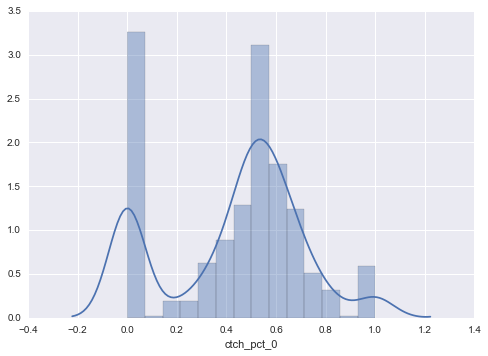


ctch_pct_1 :
NormaltestResult(statistic=377.54127248391364, pvalue=1.0422078374380373e-82)


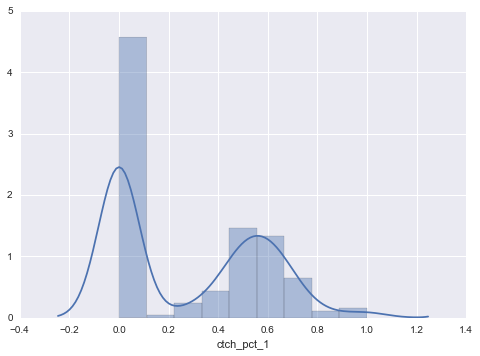


ctch_pct_2 :
NormaltestResult(statistic=136.39333354696802, pvalue=2.4130367495325845e-30)


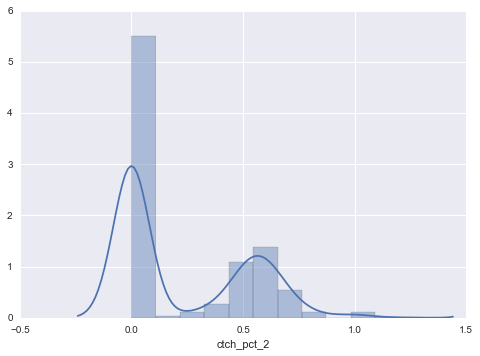


y/tgt_0 :
NormaltestResult(statistic=13.643965264447978, pvalue=0.0010895585854670342)


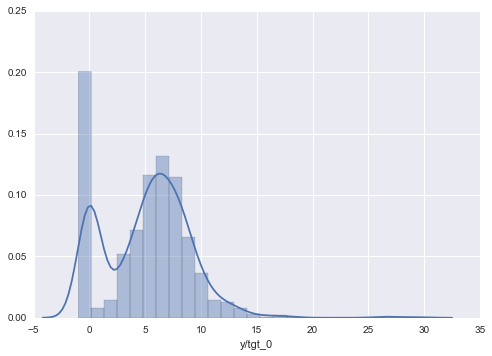


y/tgt_1 :
NormaltestResult(statistic=masked, pvalue=1.0)


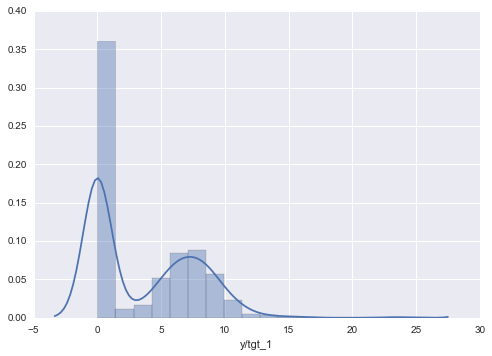


y/tgt_2 :
NormaltestResult(statistic=20.486681280827899, pvalue=3.5593744906636872e-05)


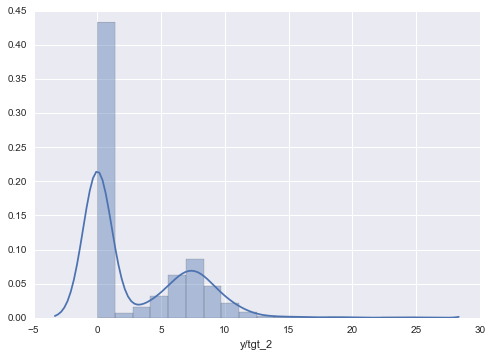


fumbles_0 :
NormaltestResult(statistic=68.237276708620271, pvalue=1.5221716626070971e-15)


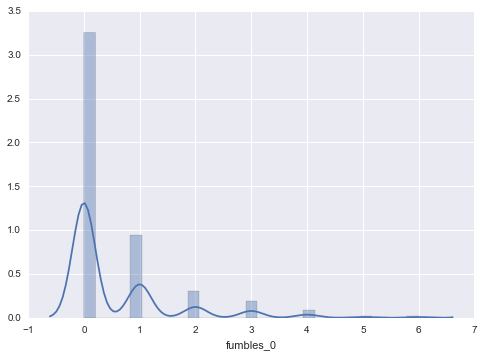


fumbles_1 :
NormaltestResult(statistic=53.458328686758314, pvalue=2.4641742771906534e-12)


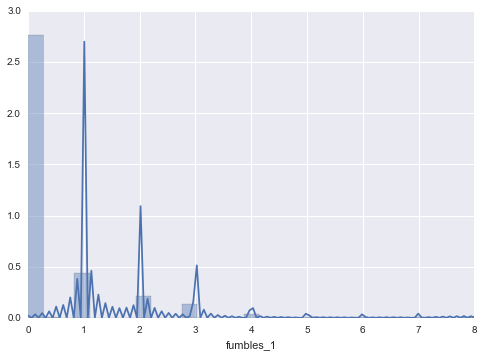


fumbles_2 :
NormaltestResult(statistic=78.883307715222301, pvalue=7.4251866044221598e-18)


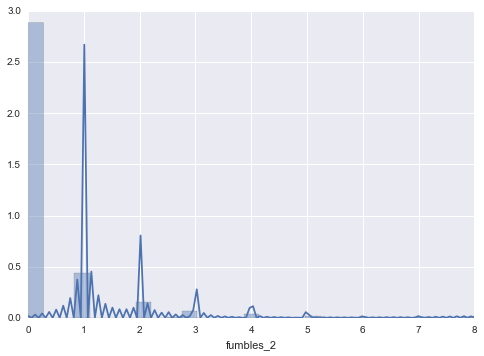


fumbles_recovered_0 :
NormaltestResult(statistic=67.066369610858629, pvalue=2.7335239185807749e-15)


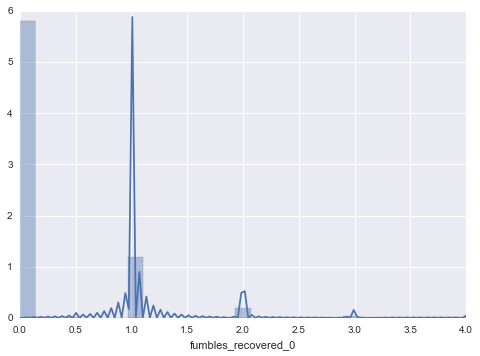


fumbles_recovered_1 :
NormaltestResult(statistic=47.493388127574029, pvalue=4.8634203161939812e-11)


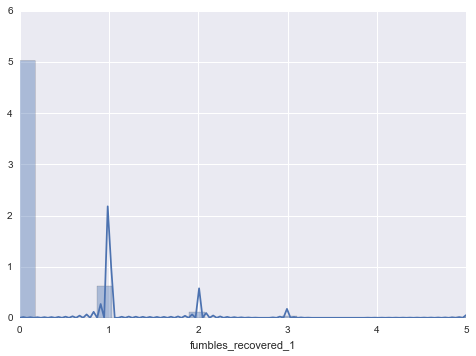


fumbles_recovered_2 :
NormaltestResult(statistic=99.824044794282798, pvalue=2.1061247526381527e-22)


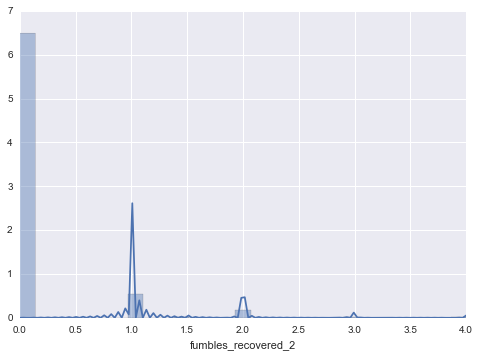


fum_ret_yds_0 :
NormaltestResult(statistic=200.91550402604162, pvalue=2.3537082865718646e-44)


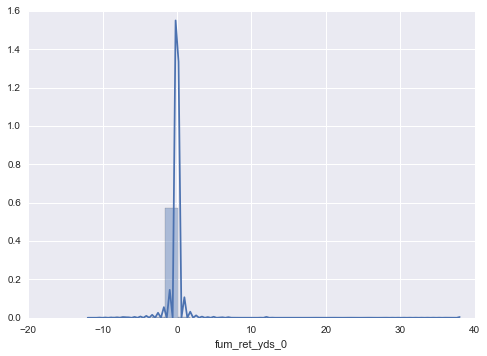


fum_ret_yds_1 :
NormaltestResult(statistic=214.62101291683399, pvalue=2.4867904728141594e-47)


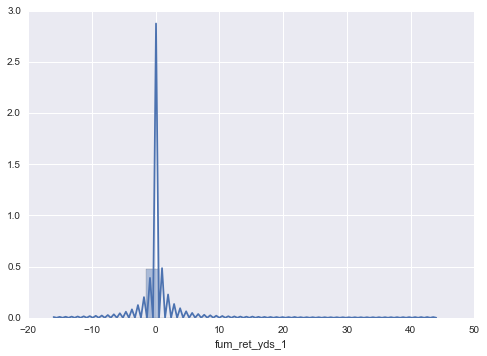


fum_ret_yds_2 :
NormaltestResult(statistic=masked, pvalue=1.0)


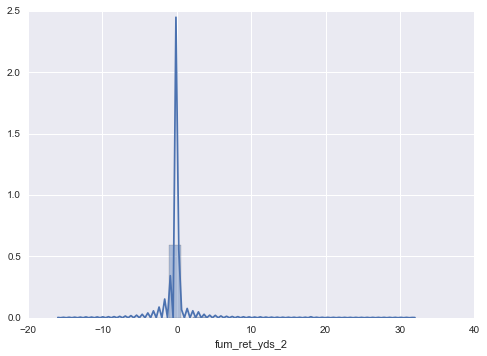


fum_tds_0 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


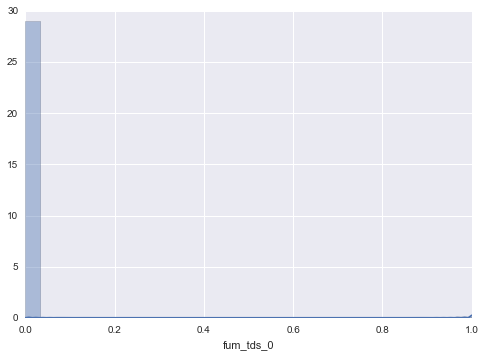


fum_tds_1 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


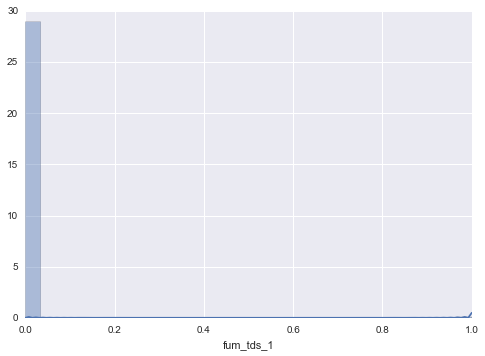


fum_tds_2 :
NormaltestResult(statistic=masked, pvalue=1.0)


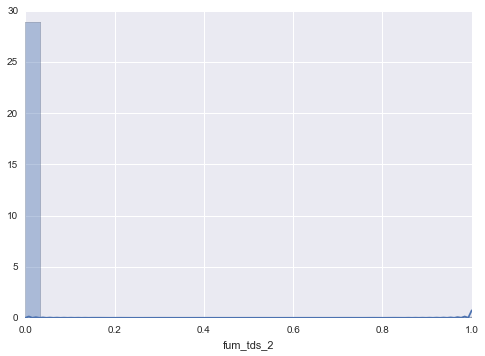


forced_fumbles_0 :
NormaltestResult(statistic=masked, pvalue=1.0)


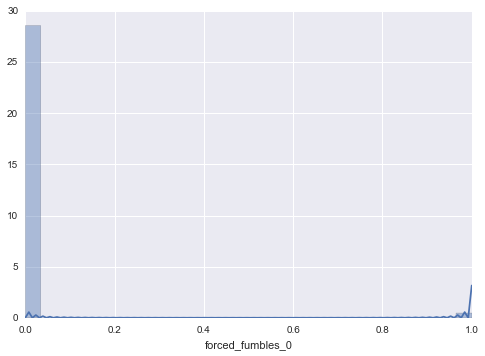


forced_fumbles_1 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


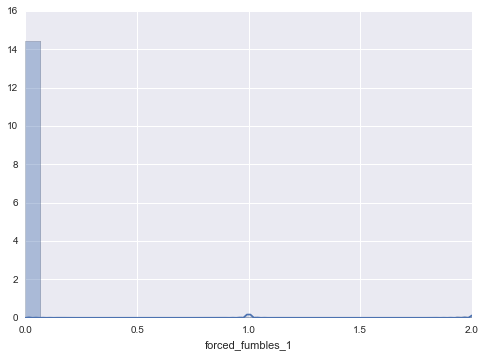


forced_fumbles_2 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


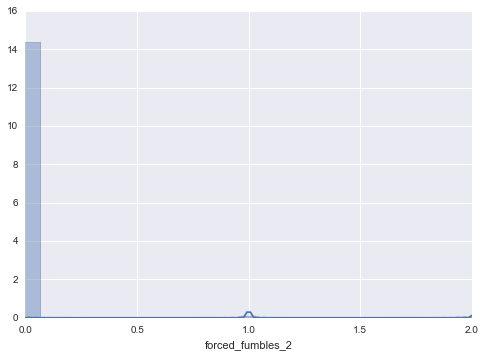


pro_bowls_0 :
NormaltestResult(statistic=157.61051719073342, pvalue=5.9608891692726081e-35)


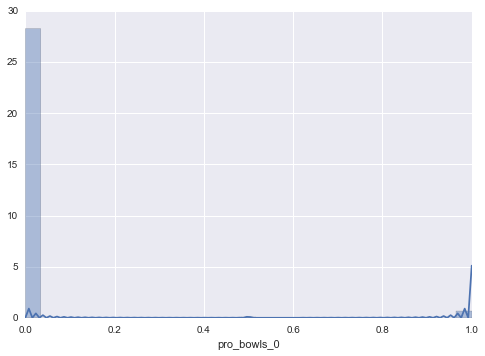


pro_bowls_1 :
NormaltestResult(statistic=171.68560325842532, pvalue=5.2353406014286387e-38)


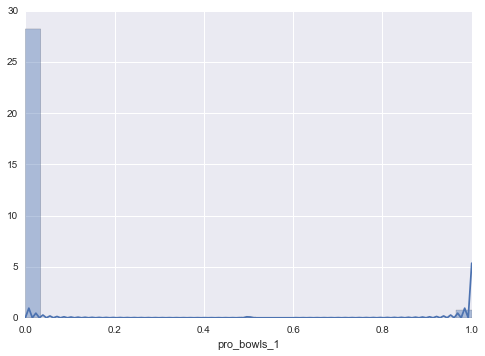


pro_bowls_2 :
NormaltestResult(statistic=108.05912404177788, pvalue=3.429725438770243e-24)


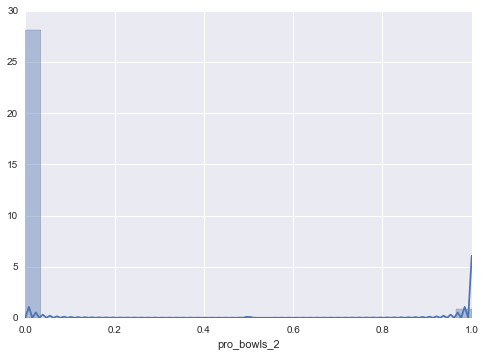


all_pros_0 :
NormaltestResult(statistic=189.03640809320422, pvalue=8.9385184962320358e-42)


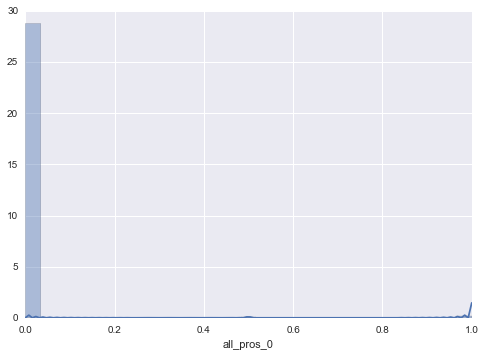


all_pros_1 :
NormaltestResult(statistic=masked, pvalue=1.0)


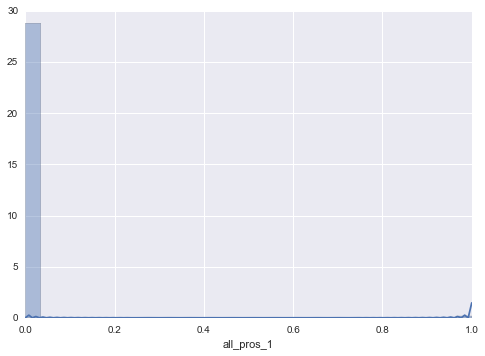


all_pros_2 :
NormaltestResult(statistic=171.68560325842535, pvalue=5.2353406014285625e-38)


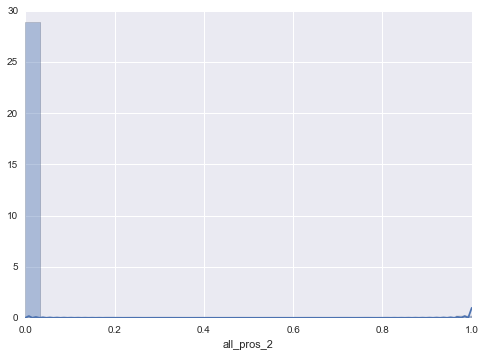


100yd_gms_0 :
NormaltestResult(statistic=87.922976201797056, pvalue=8.0866435722680568e-20)


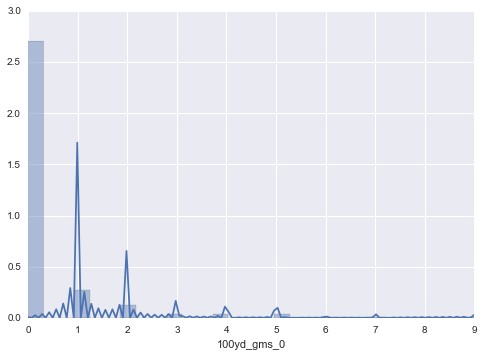


100yd_gms_1 :
NormaltestResult(statistic=72.273097016125178, pvalue=2.0234682201872188e-16)


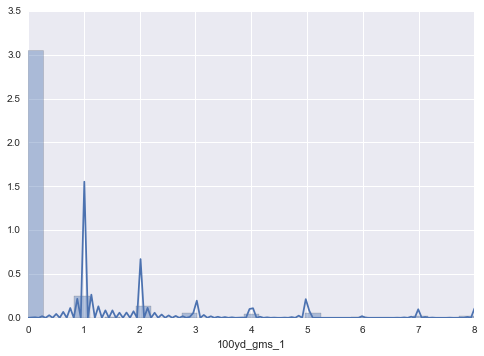


100yd_gms_2 :
NormaltestResult(statistic=108.54913151885003, pvalue=2.6844516299110299e-24)


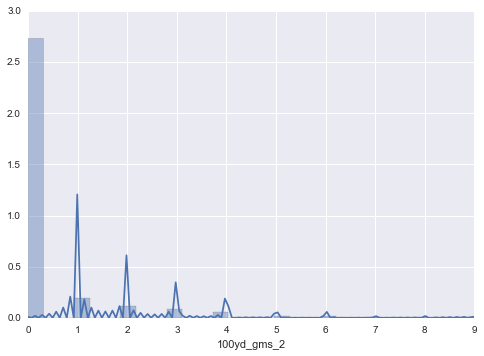


first_down_ctchs_0 :
NormaltestResult(statistic=24.070527843128001, pvalue=5.9313191174023297e-06)


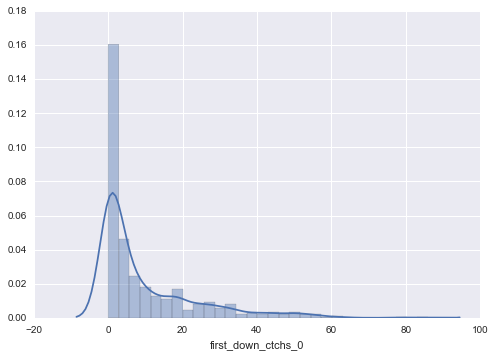


first_down_ctchs_1 :
NormaltestResult(statistic=20.347006295858758, pvalue=3.8168379461313579e-05)


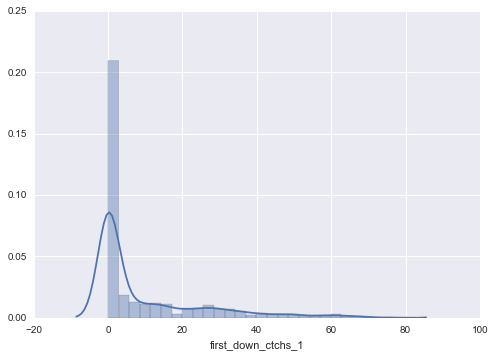


first_down_ctchs_2 :
NormaltestResult(statistic=49.197909788591915, pvalue=2.0740041870601538e-11)


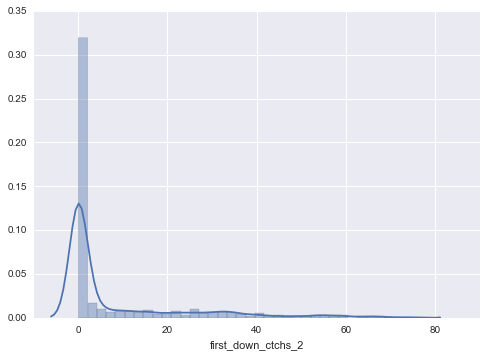


first_down_ctchpct_0 :
NormaltestResult(statistic=63.37286959531086, pvalue=1.7328310295215674e-14)


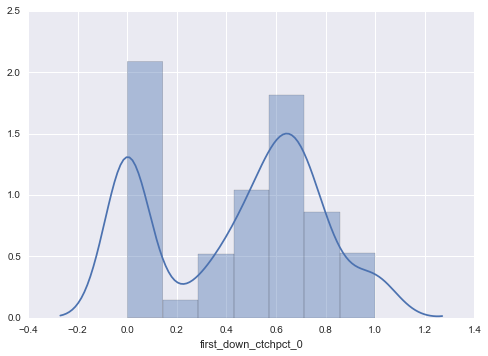


first_down_ctchpct_1 :
NormaltestResult(statistic=masked, pvalue=1.0)


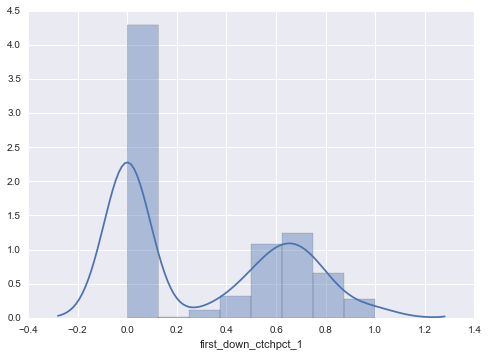


first_down_ctchpct_2 :
NormaltestResult(statistic=116.72133820239054, pvalue=4.511110332396187e-26)


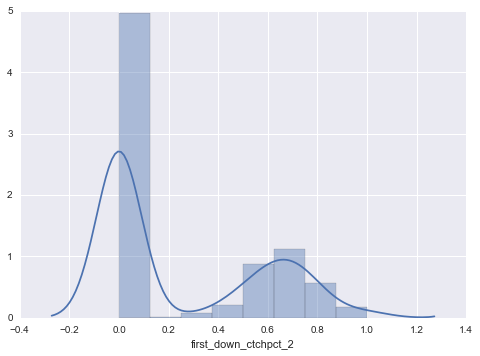


long_ctch_0 :
NormaltestResult(statistic=8.4320370996320122, pvalue=0.014757283081594989)


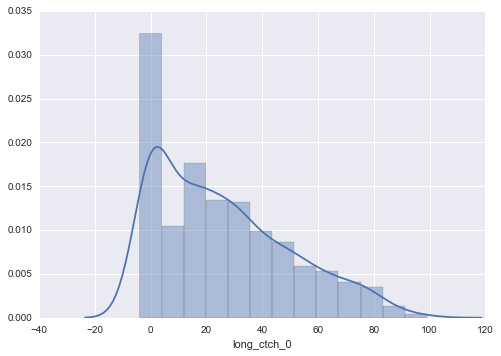


long_ctch_1 :
NormaltestResult(statistic=21.009705920720499, pvalue=2.7403139787235598e-05)


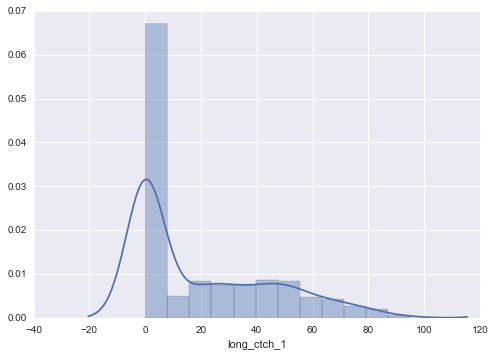


long_ctch_2 :
NormaltestResult(statistic=15.124738133169428, pvalue=0.00051964271629634348)


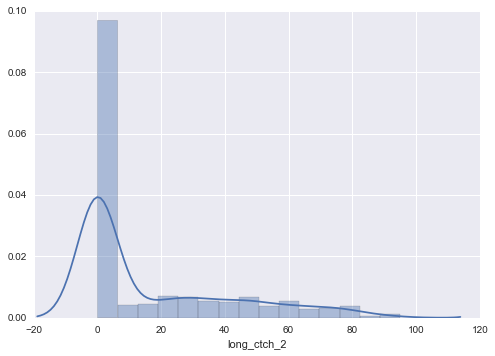


drops_0 :
NormaltestResult(statistic=43.955009331976974, pvalue=2.8529292228568282e-10)


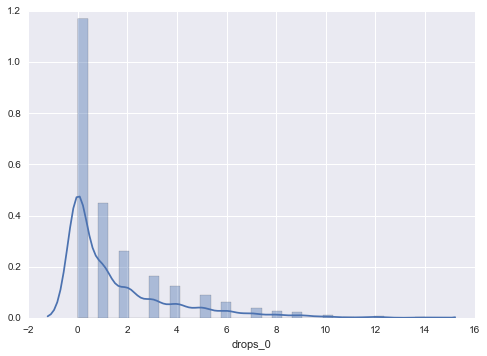


drops_1 :
NormaltestResult(statistic=38.452937827729521, pvalue=4.4673568413912071e-09)


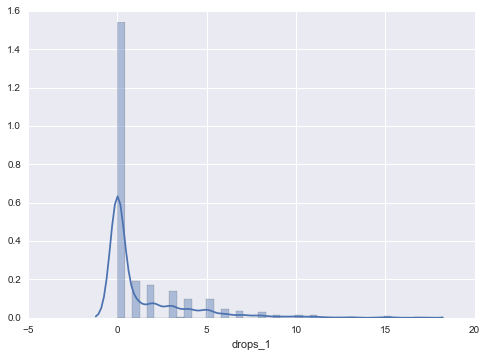


drops_2 :
NormaltestResult(statistic=50.196152461077865, pvalue=1.2590529261151277e-11)


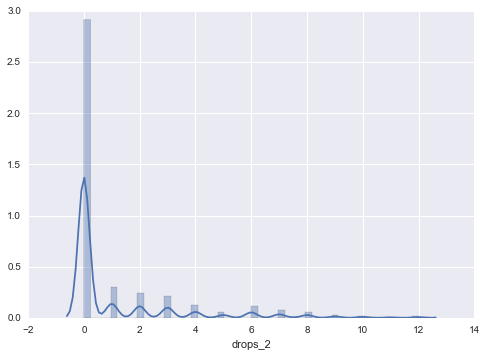


EYds_0 :
NormaltestResult(statistic=48.642658032304197, pvalue=2.7376694883605072e-11)


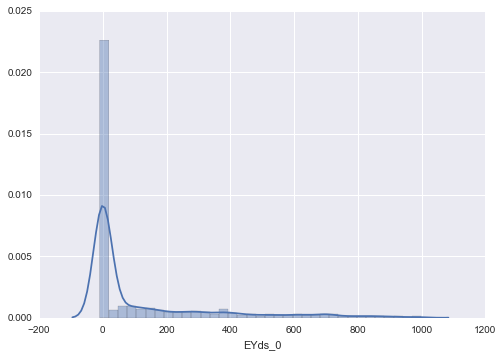


EYds_1 :
NormaltestResult(statistic=19.815438364614877, pvalue=4.9788865547910917e-05)


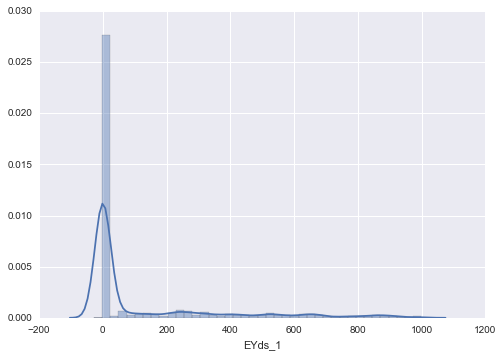


EYds_2 :
NormaltestResult(statistic=55.801231223761533, pvalue=7.636891105828772e-13)


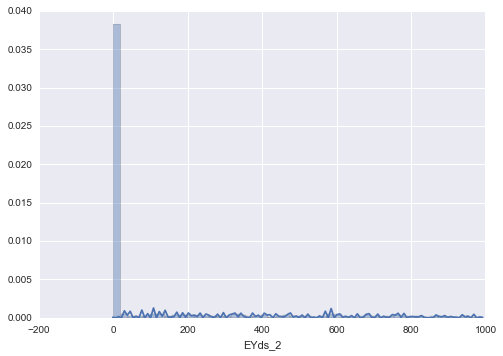


DVOA_0 :
NormaltestResult(statistic=51.76939666783089, pvalue=5.733480606565849e-12)


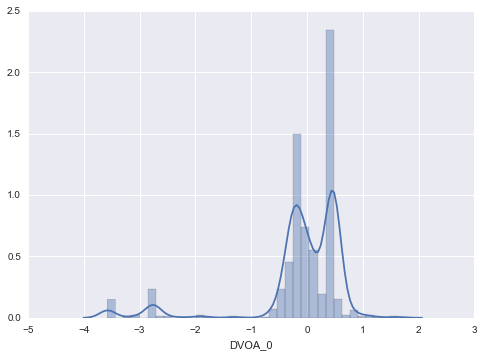


DVOA_1 :
NormaltestResult(statistic=144.26157838396719, pvalue=4.720589962425305e-32)


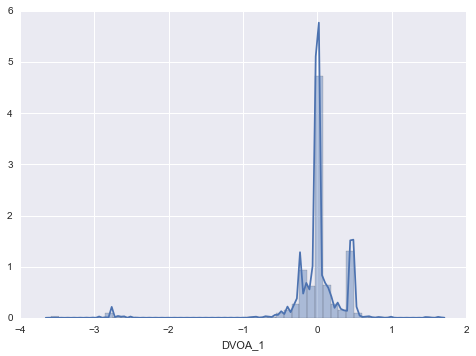


DVOA_2 :
NormaltestResult(statistic=104.45762159666825, pvalue=2.076422249903816e-23)


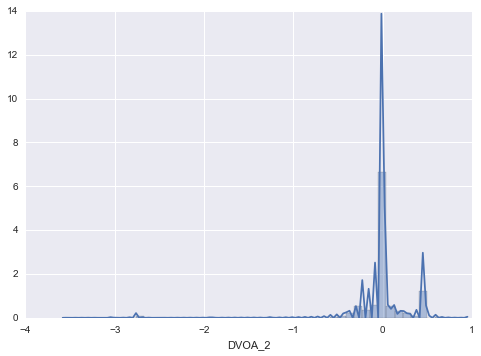


DYAR_0 :
NormaltestResult(statistic=30.184196839627369, pvalue=2.7898762252643319e-07)


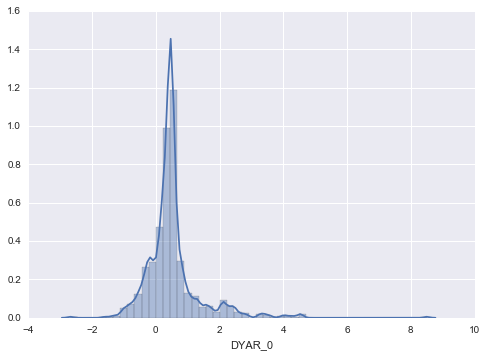


DYAR_1 :
NormaltestResult(statistic=76.461381994218044, pvalue=2.4924236333026262e-17)


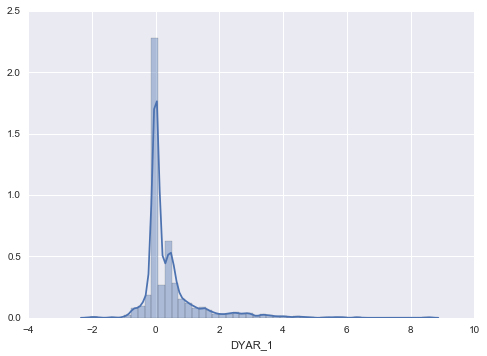


DYAR_2 :
NormaltestResult(statistic=108.76957611395395, pvalue=2.4042888776851774e-24)


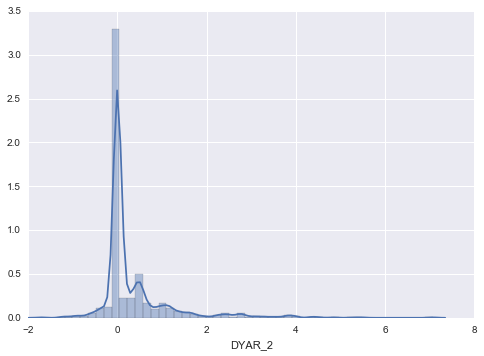


40 Yard_0 :
NormaltestResult(statistic=47.465505033072887, pvalue=4.9316987680448346e-11)


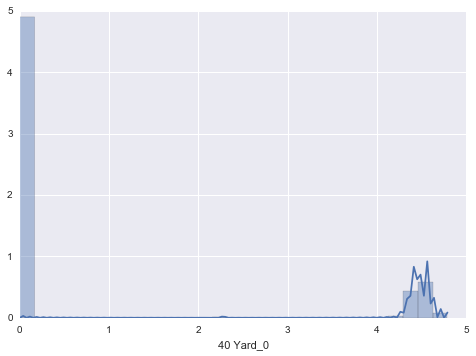


40 Yard_1 :
NormaltestResult(statistic=38.95828784742104, pvalue=3.4698865997446271e-09)


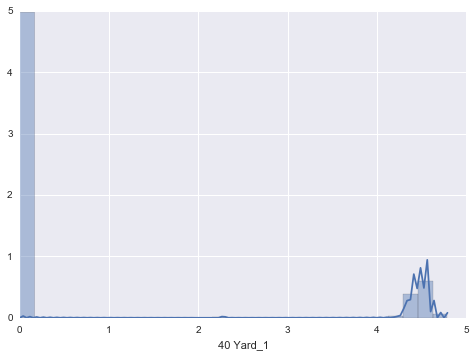


40 Yard_2 :
NormaltestResult(statistic=47.48280485736214, pvalue=4.8892239734318446e-11)


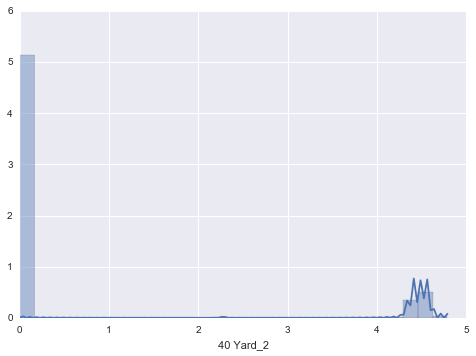


rookie_age_0 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


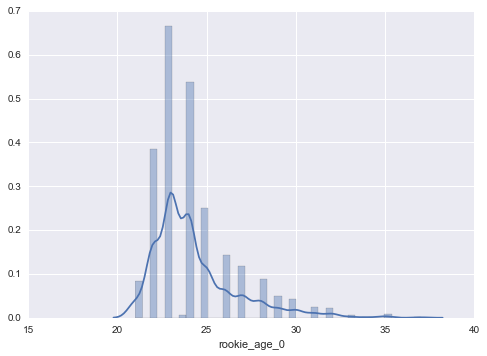


rookie_age_1 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


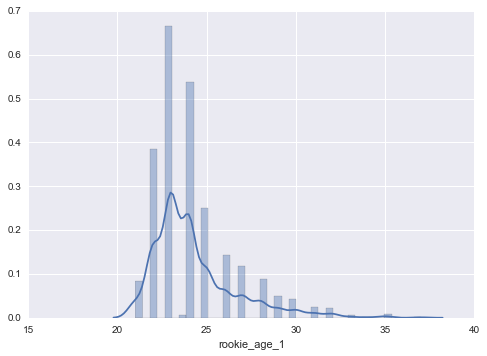


rookie_age_2 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


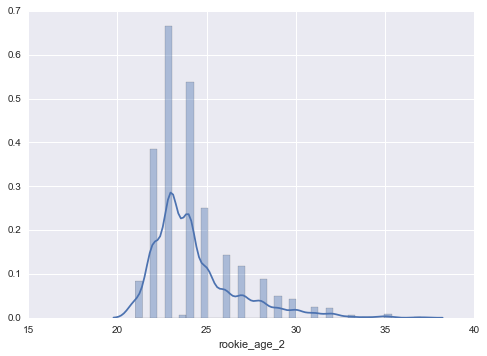


rookie_season_0 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


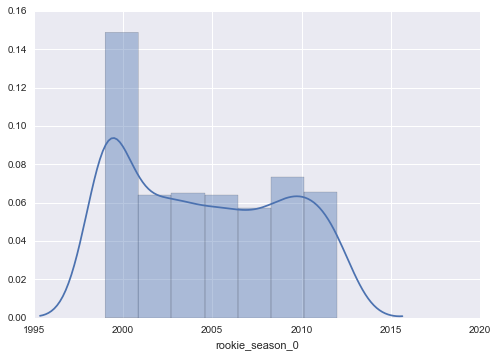


rookie_season_1 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


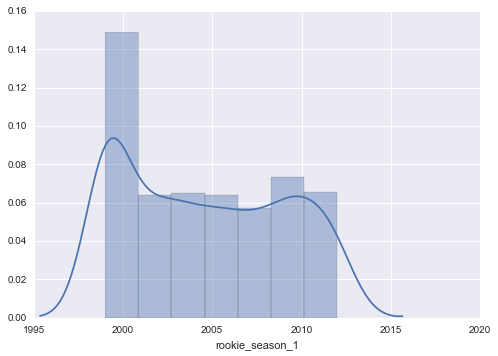


rookie_season_2 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


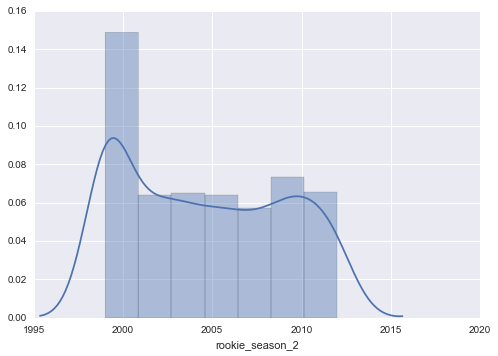


height_inches_0 :
NormaltestResult(statistic=1.0082519199790083, pvalue=0.60403329403651496)


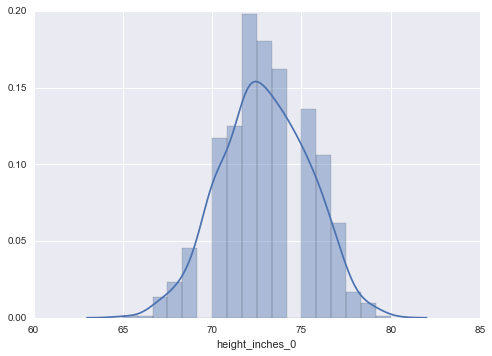


height_inches_1 :
NormaltestResult(statistic=1.0082519199790083, pvalue=0.60403329403651496)


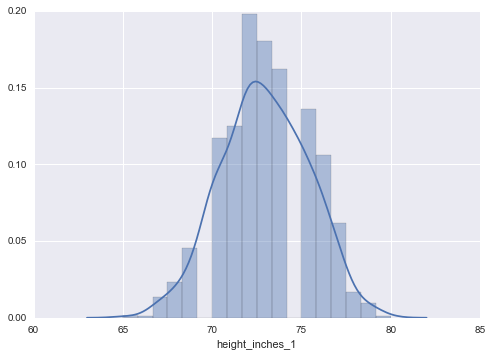


height_inches_2 :
NormaltestResult(statistic=1.0082519199790083, pvalue=0.60403329403651496)


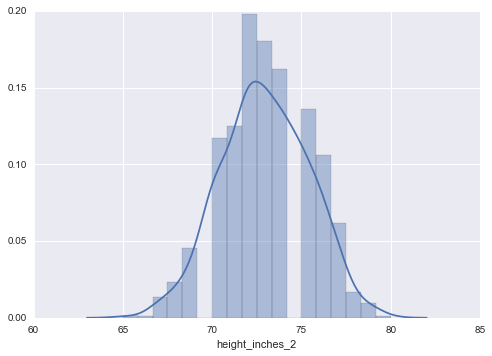


start_ratio_0 :
NormaltestResult(statistic=17.636950209140277, pvalue=0.0001479738328987494)


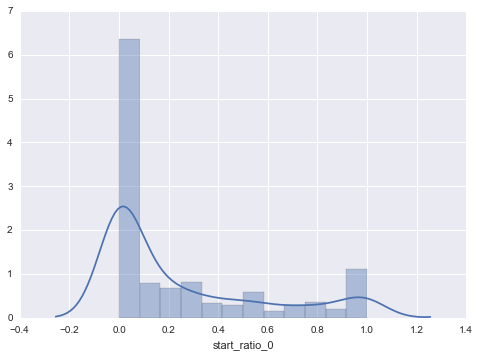


start_ratio_1 :
NormaltestResult(statistic=22.726228897723551, pvalue=1.1616146955178553e-05)


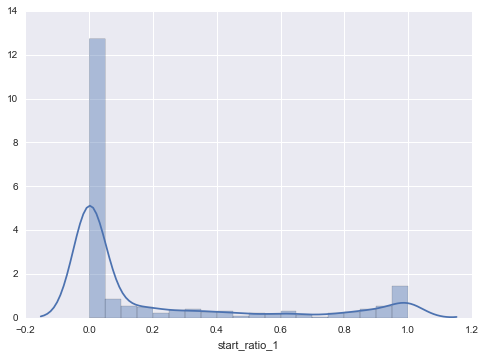


start_ratio_2 :
NormaltestResult(statistic=30.175186252094168, pvalue=2.802473793796659e-07)


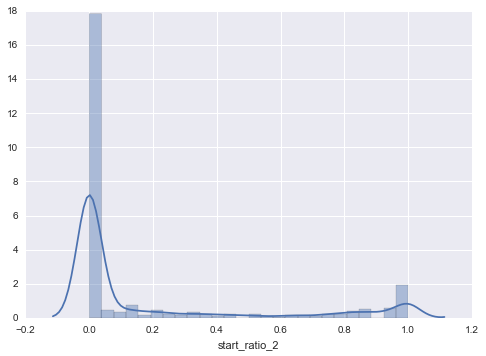


dpis_drawn_0 :
NormaltestResult(statistic=98.090357748261553, pvalue=5.0112890215712531e-22)


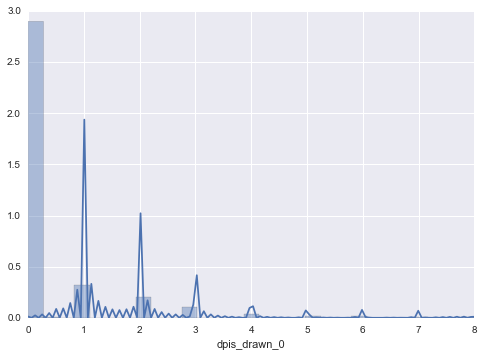


dpis_drawn_1 :
NormaltestResult(statistic=65.655923924947444, pvalue=5.5334662773726241e-15)


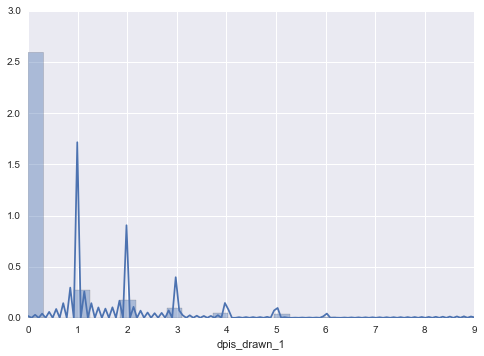


dpis_drawn_2 :
NormaltestResult(statistic=97.295141699339638, pvalue=7.4581037746345678e-22)


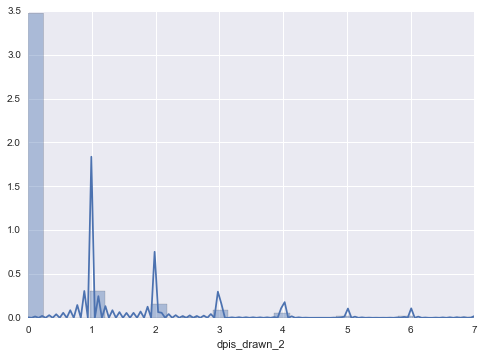


dpi_yards_0 :
NormaltestResult(statistic=117.72240621205299, pvalue=2.7346660111033515e-26)


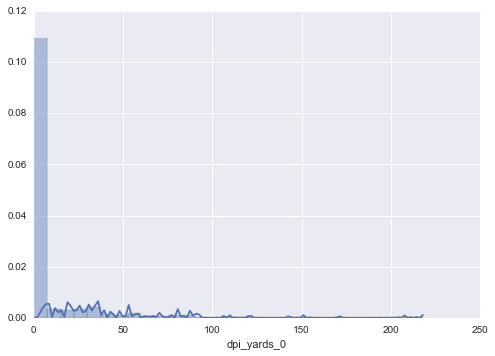


dpi_yards_1 :
NormaltestResult(statistic=68.273248096165005, pvalue=1.4950390797891427e-15)


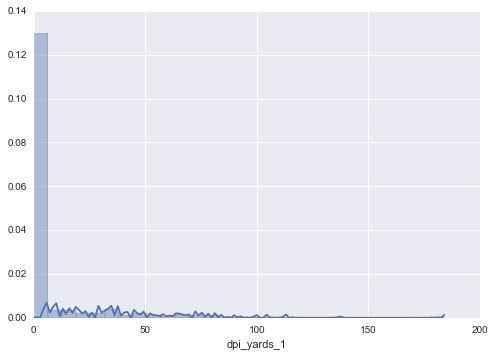


dpi_yards_2 :
NormaltestResult(statistic=112.57552976775723, pvalue=3.5853727407875963e-25)


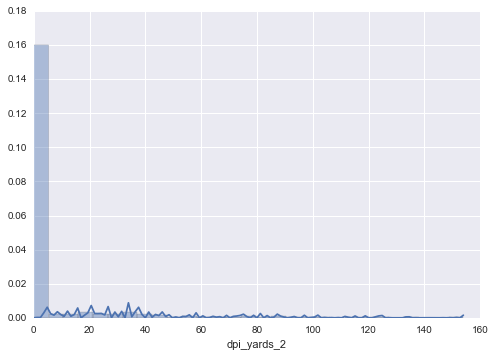


pct_team_tgts_0 :
NormaltestResult(statistic=21.951103934289243, pvalue=1.7115056801998141e-05)


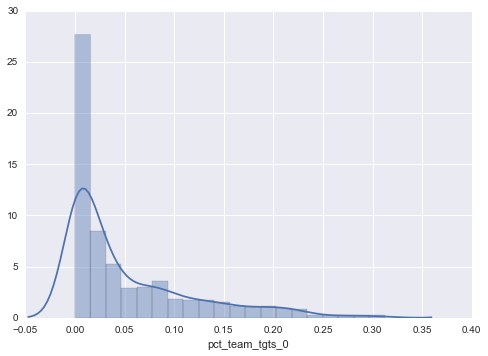


pct_team_tgts_1 :
NormaltestResult(statistic=21.159825598682403, pvalue=2.5421563196608266e-05)


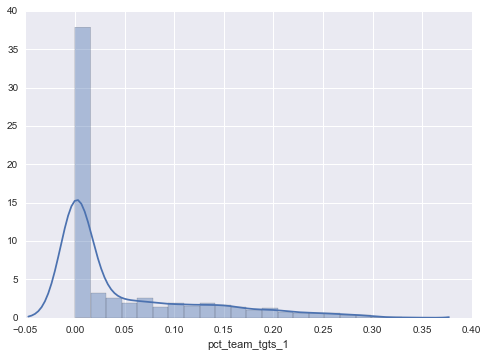


pct_team_tgts_2 :
NormaltestResult(statistic=37.770046990342522, pvalue=6.2854808192125634e-09)


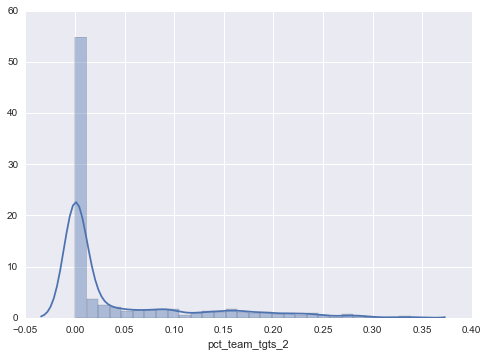


pct_team_receptions_0 :
NormaltestResult(statistic=19.678015162912175, pvalue=5.333021075501282e-05)


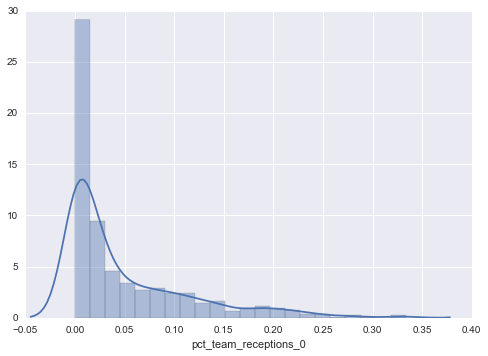


pct_team_receptions_1 :
NormaltestResult(statistic=26.09904138096736, pvalue=2.1511226474829203e-06)


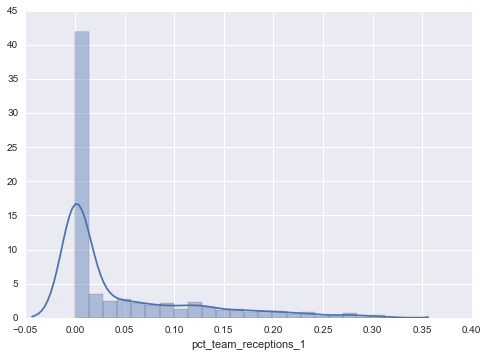


pct_team_receptions_2 :
NormaltestResult(statistic=43.856737878242896, pvalue=2.9966110220907244e-10)


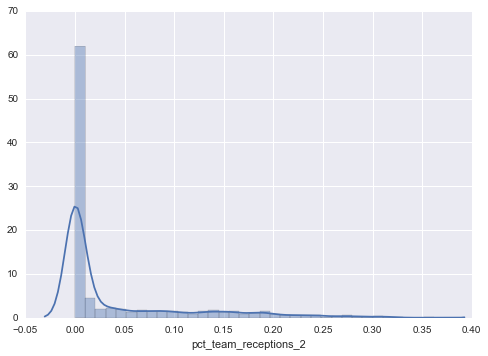


pct_of_team_passyards_0 :
NormaltestResult(statistic=32.43314133911106, pvalue=9.0621833093664194e-08)


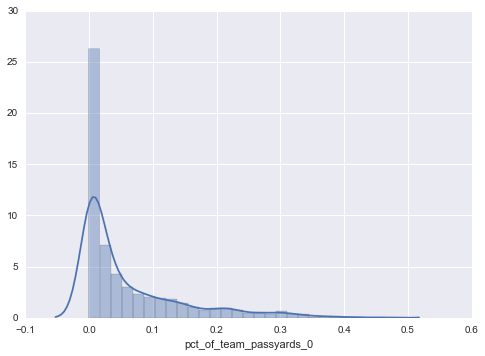


pct_of_team_passyards_1 :
NormaltestResult(statistic=24.301646649665425, pvalue=5.284020324794407e-06)


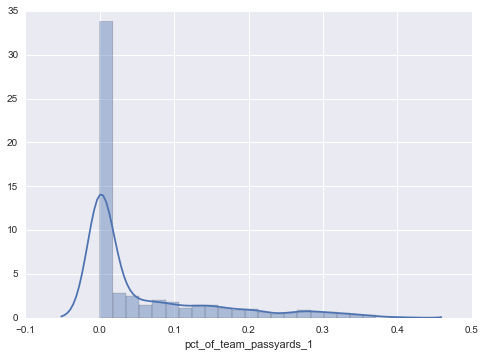


pct_of_team_passyards_2 :
NormaltestResult(statistic=43.815319849977243, pvalue=3.0593149090044634e-10)


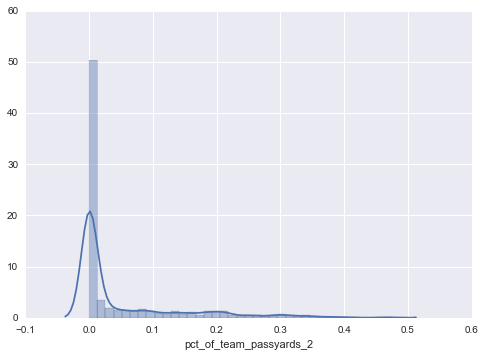


pct_team_touchdowns_0 :
NormaltestResult(statistic=39.211459384753077, pvalue=3.057312140712981e-09)


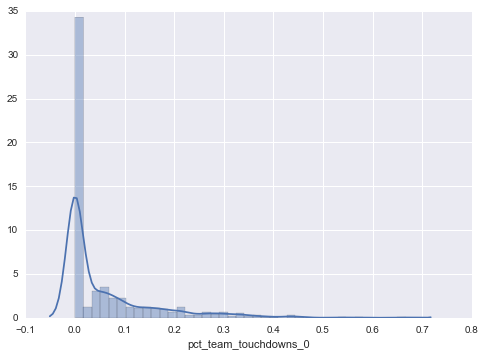


pct_team_touchdowns_1 :
NormaltestResult(statistic=46.877042139828276, pvalue=6.6188057476678818e-11)


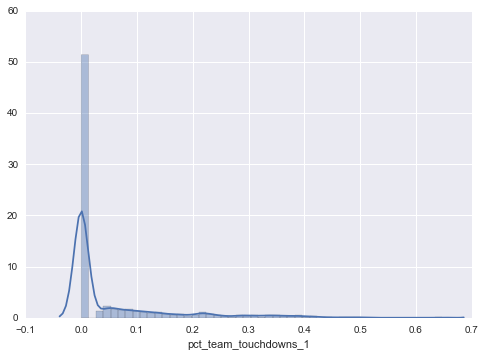


pct_team_touchdowns_2 :
NormaltestResult(statistic=63.912901140055354, pvalue=1.3227868114368528e-14)


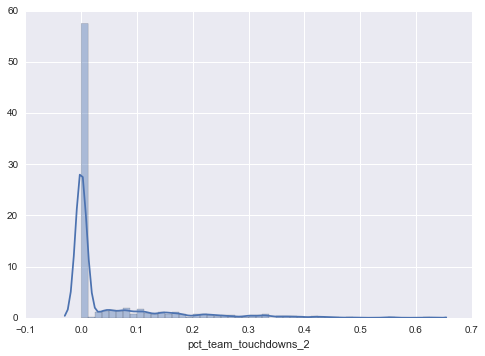


dropK_0 :
NormaltestResult(statistic=19.142939706242718, pvalue=6.9688875867029025e-05)


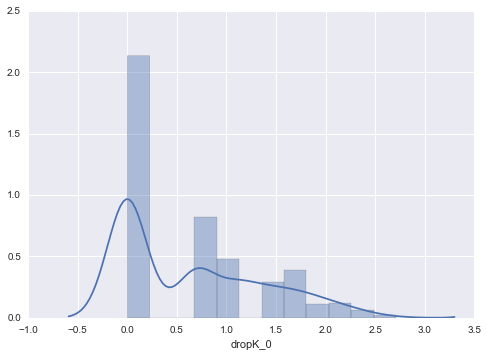


dropK_1 :
NormaltestResult(statistic=17.255955106109667, pvalue=0.0001790263505726371)


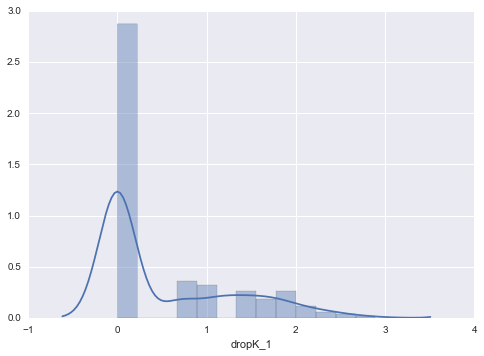


dropK_2 :
NormaltestResult(statistic=19.292856087307108, pvalue=6.4656103835977305e-05)


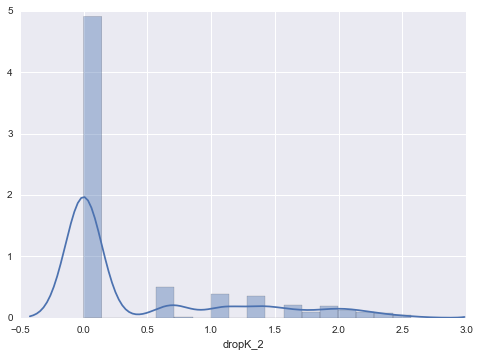


compilation_0 :
NormaltestResult(statistic=52.70527213511474, pvalue=3.5908360140042855e-12)


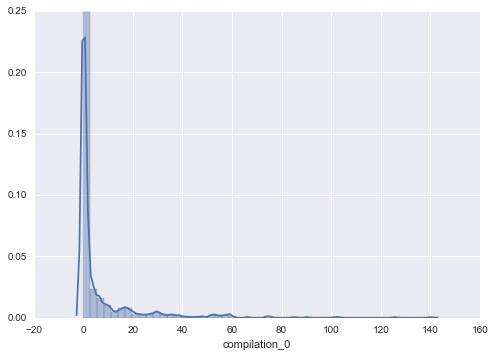


compilation_1 :
NormaltestResult(statistic=82.761122382790191, pvalue=1.0681951862467985e-18)


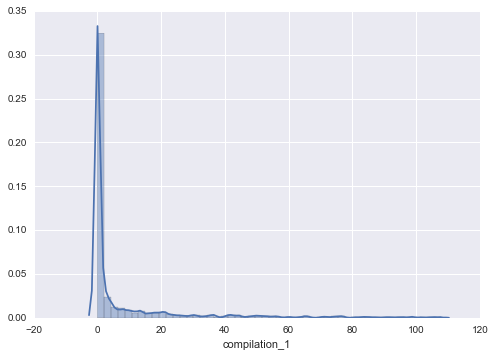


compilation_2 :
NormaltestResult(statistic=90.617057553883811, pvalue=2.1025966543022538e-20)


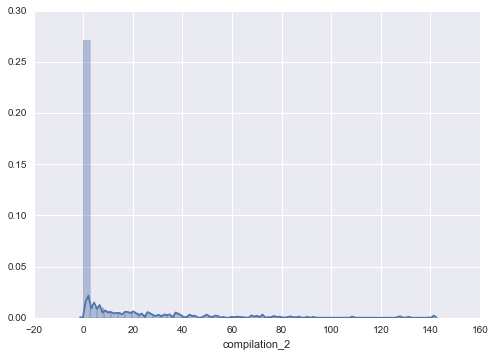


compilation_3 :
NormaltestResult(statistic=117.47335566967627, pvalue=3.0973118279009782e-26)


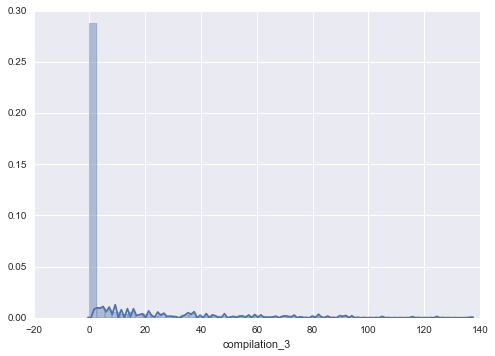

In [14]:
## the following loop will loop through every numeric column in the dataframe and 
## create a histogram of a random sample of that column and also perform a normal 
## test on that histogram

## the normal test sets the null hypothesis as "this sample comes from a normal distribution"
## so we would be able to accept that null hypothesis if the pvalue is greater than .05

import scipy

data_numeric = data[data.describe().columns]

for i in data_numeric:
    rand_sample = data_numeric[i].sample(100, random_state=6)
    print i,':\n', scipy.stats.mstats.normaltest(rand_sample)
    sns.distplot(data_numeric[i])
    plt.xlabel(i)
    plt.show()
    print

In [22]:
## I will be performing PCA on all the numeric columns right now (data_numeric)

from sklearn import preprocessing

## standardizing all the columns

data_stand = preprocessing.StandardScaler().fit_transform(data_numeric)
data_stand

array([[ 1.4452578 ,  1.4452578 ,  1.4452578 , ...,  5.03178233,
         4.09982337,  2.89197863],
       [ 1.67020466,  1.67020466,  1.67020466, ..., -0.39109615,
        -0.38144212, -0.37126379],
       [ 0.99536407,  0.99536407,  0.99536407, ..., -0.42418873,
        -0.38144212, -0.37126379],
       ..., 
       [ 0.09557662,  0.09557662,  0.09557662, ..., -0.42418873,
        -0.38144212, -0.37126379],
       [-1.25410456, -1.25410456, -1.25410456, ..., -0.42418873,
        -0.38144212, -0.37126379],
       [-0.35431711, -0.35431711, -0.35431711, ..., -0.42418873,
        -0.38144212, -0.37126379]])

In [23]:
## creating the covariance matrix - this explains the variance between the different
## features within our dataframe

## for example, the value in the i,j position within the matrix explains the variance
## between the ith and the jth elements of a random vector, or between our features

cov_mat = np.cov(data_stand.T)

In [25]:
## creating my eigenvalues and corresponding eigenvectors

eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [26]:
print eigenValues 
print
print
print eigenVectors 

[  4.30783041e+01 +0.00000000e+00j   1.09666982e+01 +0.00000000e+00j
   6.86166439e+00 +0.00000000e+00j   6.68071061e+00 +0.00000000e+00j
   5.44503473e+00 +0.00000000e+00j   4.88149825e+00 +0.00000000e+00j
   4.23000293e+00 +0.00000000e+00j   3.92806407e+00 +0.00000000e+00j
   3.14822131e+00 +0.00000000e+00j   2.80767564e+00 +0.00000000e+00j
   2.61910617e+00 +0.00000000e+00j   2.28125966e+00 +0.00000000e+00j
   2.20388788e+00 +0.00000000e+00j   2.01779174e+00 +0.00000000e+00j
   1.75279960e+00 +0.00000000e+00j   1.62585113e+00 +0.00000000e+00j
   1.48767340e+00 +0.00000000e+00j   1.45174352e+00 +0.00000000e+00j
   1.37014855e+00 +0.00000000e+00j   1.27067314e+00 +0.00000000e+00j
   1.21161089e+00 +0.00000000e+00j   1.16415251e+00 +0.00000000e+00j
   1.10269726e+00 +0.00000000e+00j   1.06421597e+00 +0.00000000e+00j
   1.02956863e+00 +0.00000000e+00j   9.90524263e-01 +0.00000000e+00j
   9.81390858e-01 +0.00000000e+00j   9.52973230e-01 +0.00000000e+00j
   9.33347083e-01 +0.00000000e+00j

In [29]:
## creating the eigenpairs - just pairing the eigenvalue with its eigenvector
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

## sort in ascending order and then reverse to descending (for clarification's sake)
# eigenPairs.sort()
# eigenPairs.reverse()

## loop through the eigenpairs and printing out the first row (eigenvalue)
## this is also seen in the code block above but just wanted to loop through again
## as it is a bit more clear like this
## I am also creating a list of the eigenvalues in ascending order to be able to reference it
sort_values = []
for i in eigenPairs:
    print i[0]
    sort_values.append(i[0])


43.0783040898
10.966698243
6.86166439269
6.68071061285
5.44503473197
4.88149824811
4.23000293415
3.92806406704
3.1482213138
2.80767563885
2.61910617261
2.28125965814
2.20388787738
2.01779174308
1.75279960055
1.62585113083
1.48767340066
1.45174352472
1.37014854748
1.27067313772
1.21161088639
1.1641525122
1.10269726307
1.06421596972
1.02956863225
0.990524263377
0.981390857971
0.952973229576
0.933347083234
0.887911535265
0.86059253198
0.818524985899
0.781395049984
0.799267073131
0.737241620482
0.68925912676
0.668923013844
0.627634533082
0.615179840475
0.596355328681
0.570446494169
0.542841648918
0.514568465155
0.480904422763
0.468601254727
0.454413514108
0.448305354897
0.389026805637
0.384342822918
0.354979813732
0.370361533554
0.339369349849
0.324572159604
0.306254192223
0.296751632307
0.290498128233
0.266465841969
0.252506920296
0.253449684027
0.254363107361
0.228760732907
0.220254772907
0.213270077544
0.199073904453
0.191527878397
0.18022048411
0.17499479931
0.16155992338
0.16416769688

In [30]:
## we have the eigenvalues above showing us feature correlation explanation, but it helps
## to see the cumulative variance explained as well, which i can show below

## need to sum the eigen values to get percentages
sumEigenvalues = sum(eigenValues)

## this is a percentage explanation
variance_explained = [(i/sumEigenvalues)*100 for i in sort_values]
variance_explained

[(30.956044866883669+0j),
 (7.8806631324852692+0j),
 (4.9307881377711462+0j),
 (4.8007548542949525+0j),
 (3.9127988676838665+0j),
 (3.5078418702565379+0j),
 (3.0396777074489187+0j),
 (2.8227046089299672+0j),
 (2.2623100491084673+0j),
 (2.0175941203897869+0j),
 (1.8820882089837201+0j),
 (1.6393118954495272+0j),
 (1.5837125777188998+0j),
 (1.449984001242415+0j),
 (1.259560798035559+0j),
 (1.168335699748611+0j),
 (1.0690412612817273+0j),
 (1.0432220728264696+0j),
 (0.984587968494399+0j),
 (0.91310499550648627+0j),
 (0.87066289522732565+0j),
 (0.83655933447453168+0j),
 (0.79239762733222285+0j),
 (0.7647449917741328+0j),
 (0.73984743473282777+0j),
 (0.71179017342182671+0j),
 (0.70522691348181343+0j),
 (0.68480602184703088+0j),
 (0.67070268422629709+0j),
 (0.63805272524559742+0j),
 (0.61842130499193038+0j),
 (0.58819159025670942+0j),
 (0.56151003938386779+0j),
 (0.57435286507251726+0j),
 (0.52978141000607581+0j),
 (0.49530121725295378+0j),
 (0.48068769805462802+0j),
 (0.45101781921547351+0j)

In [32]:
### based on the above results, it seems that sticking to 47 features would be a decent
## cutoff point since the variance explained per feature drops below .3%

## this can very easily be manipulated by changing n_components adn then adding/subtracting
## columns to the dataframe in the code block below

## instantiate
pca = PCA(n_components = 47)

## fit and transform the standardized data
pca_cols = pca.fit_transform(data_stand)

In [35]:
## Here I am simply creating the column headers for the pca features
pca_col_list = []

for i in range(1, 48):
    pca_col_list.append('pca'+str(i))
    

In [37]:
## going to organize the columns into dataframe for organization
pca_df = pd.DataFrame(pca_cols, columns = pca_col_list)

##previewing dataframe
print pca_df.shape
pca_df.head()

(872, 47)


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47
0,21.829466,0.262940,5.195232,-0.082885,-0.575679,3.183503,9.289928,5.297760,-0.990432,4.130805,...,-1.652511,-0.385336,0.486508,0.245389,-0.184341,1.811732,-0.235451,-0.279161,0.447995,-1.231907
1,-3.570865,-3.999207,-0.055169,-2.152663,1.976798,1.773675,2.499411,0.279346,-0.177562,-1.423368,...,0.774548,-0.663243,0.419884,-0.684052,-0.132388,0.261482,-0.383364,-0.535977,0.254640,0.083359
2,-4.181278,0.021716,0.762426,-2.385240,-1.056471,-1.275805,1.574292,-0.445850,-1.062584,0.627186,...,-0.230007,0.244955,-0.189425,0.708982,0.130507,0.297076,0.289428,-0.989049,-0.128309,0.554733
3,-5.458280,1.517360,4.467691,1.024867,0.235192,1.290156,-0.374269,-0.559514,0.683504,0.771689,...,0.275546,0.471263,-0.040454,0.022186,0.243194,-0.194229,0.100808,-0.017654,-0.493243,-0.437413
4,-1.969560,-1.163946,-0.566113,0.583154,1.110218,-1.699421,-1.860229,0.245397,-0.620881,2.682804,...,0.027347,-0.276262,0.110242,-0.243020,-0.168993,0.303997,-0.874926,0.532092,-0.100187,-0.427983


In [40]:
## We used all of our columns to perform the PCA so we only need to join the names back on
## since we would not want to build a model off of 
## I am going to set the index of our pca dataframe to the names of the related player

pca_df.set_index(data['name'], drop = False, inplace = True)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,21.829466,0.262940,5.195232,-0.082885,-0.575679,3.183503,9.289928,5.297760,-0.990432,4.130805,...,-1.652511,-0.385336,0.486508,0.245389,-0.184341,1.811732,-0.235451,-0.279161,0.447995,-1.231907
A.J. Jenkins,-3.570865,-3.999207,-0.055169,-2.152663,1.976798,1.773675,2.499411,0.279346,-0.177562,-1.423368,...,0.774548,-0.663243,0.419884,-0.684052,-0.132388,0.261482,-0.383364,-0.535977,0.254640,0.083359
Aaron Brown,-4.181278,0.021716,0.762426,-2.385240,-1.056471,-1.275805,1.574292,-0.445850,-1.062584,0.627186,...,-0.230007,0.244955,-0.189425,0.708982,0.130507,0.297076,0.289428,-0.989049,-0.128309,0.554733
Aaron Halterman,-5.458280,1.517360,4.467691,1.024867,0.235192,1.290156,-0.374269,-0.559514,0.683504,0.771689,...,0.275546,0.471263,-0.040454,0.022186,0.243194,-0.194229,0.100808,-0.017654,-0.493243,-0.437413
Aaron Moorehead,-1.969560,-1.163946,-0.566113,0.583154,1.110218,-1.699421,-1.860229,0.245397,-0.620881,2.682804,...,0.027347,-0.276262,0.110242,-0.243020,-0.168993,0.303997,-0.874926,0.532092,-0.100187,-0.427983


In [ ]:
## Now